In [ ]:
p# imports

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
  import pyro 
except ModuleNotFoundError:
  !pip install pyro-ppl
  import pyro


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 722 kB 5.1 MB/s 


# Tensors and PyTorch

Source: https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial2/Introduction_to_PyTorch.html

## Basics

We will start with reviewing the basic concepts of PyTorch. As a prerequisite, we recommend to be familiar with the *numpy* package as most machine learning frameworks are based on very similar concepts. If you are not familiar with *numpy* yet, don't worry: here is a tutorial to go through. If you are familiar though, you might want to skip this.

Let's start with importing PyTorch. The package is called torch, based on its original framework Torch. As a first step, we can check its version:

In [ ]:
import torch

print("Using torch", torch.__version__)

Using torch 1.12.1+cu113


As in every machine learning framework, PyTorch provides functions that are stochastic like generating random numbers. However, a very good practice is to setup your code to be reproducible with the exact same random numbers. This is why we set a seed below. As everyone knows, 42 is the best seed. 

In [ ]:
torch.manual_seed(42) # Setting the seed

## Tensors

Let’s first start by looking at different ways of creating a tensor. There are many possible options, the simplest one is to call torch.Tensor passing the desired shape as input argument:

In [ ]:
x = torch.Tensor(2, 3, 4)
print(x)

tensor([[[3.0811e-34, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]])


The function `torch.Tensor` allocates memory for the desired tensor, but reuses any values that have already been in the memory. To directly assign values to the tensor during initialization, there are many alternatives including:

* `torch.zeros`: Creates a tensor filled with zeros
* `torch.ones`: Creates a tensor filled with ones
* `torch.rand`: Creates a tensor with random values uniformly sampled between 0 and 1
* `torch.randn`: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1
* `torch.arange`: Creates a tensor containing the values $N,N+1,N+2,...,M$
* `torch.Tensor` (input list): Creates a tensor from the list elements you provide

In [ ]:
# Create a tensor from a (nested) list
x = torch.Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])


You can obtain the shape of a tensor in the same way as in numpy (x.shape), or using the .size method:



In [ ]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


## Tensors and NumPy

Tensors can be converted to numpy arrays, and numpy arrays back to tensors. To transform a numpy array into a tensor, we can use the function torch.from_numpy:

In [ ]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])


To transform a PyTorch tensor back to a numpy array, we can use the function .numpy() on tensors:

In [ ]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


The conversion of tensors to numpy require the tensor to be on the CPU, and not the GPU (more on GPU support in a later section). In case you have a tensor on GPU, you need to call `.cpu()` on the tensor beforehand. Hence, you get a line like `np_arr = tensor.cpu().numpy()`.

## Operations

Most operations that exist in numpy, also exist in PyTorch. A full list of operations can be found in the [PyTorch documentation](https://pytorch.org/docs/stable/tensors.html#), but we will review the most important ones here.

The simplest operation is to add two tensors:

In [ ]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.1053, 0.2695, 0.3588],
        [0.1994, 0.5472, 0.0062]])
X2 tensor([[0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090]])
Y tensor([[1.0569, 0.3448, 1.2448],
        [0.7826, 0.8848, 0.8151]])


Calling `x1 + x2` creates a new tensor containing the sum of the two inputs. However, we can also use in-place operations that are applied directly on the memory of a tensor. We therefore change the values of `x2` without the chance to re-accessing the values of `x2` before the operation. An example is shown below:

In [ ]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (before) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (before) tensor([[0.7104, 0.9464, 0.7890],
        [0.2814, 0.7886, 0.5895]])
X1 (after) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (after) tensor([[1.2884, 1.8504, 1.3437],
        [0.6237, 1.4230, 0.9539]])


In-place operations are usually marked with a underscore postfix (e.g. "add_" instead of "add").

Another common operation aims at changing the shape of a tensor. A tensor of size (2,3) can be re-organized to any other shape with the same number of elements (e.g. a tensor of size (6), or (3,2), ...). In PyTorch, this operation is called `view`:

In [ ]:
x = x1.view(2, 3)
print("X", x)

X tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])


Other commonly used operations include matrix multiplications, which are essential for neural networks. Quite often, we have an input vector $\mathbf{x}$, which is transformed using a learned weight matrix $\mathbf{W}$. There are multiple ways and functions to perform matrix multiplication, some of which we list below:

* `torch.matmul`: Performs the matrix product over two tensors, where the specific behavior depends on the dimensions. If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product. For higher dimensional inputs, the function supports broadcasting (for details see the [documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)). Can also be written as `a @ b`, similar to numpy. 
* `torch.mm`: Performs the matrix product over two matrices, but doesn't support broadcasting (see [documentation](https://pytorch.org/docs/stable/generated/torch.mm.html?highlight=torch%20mm#torch.mm))
* `torch.bmm`: Performs the matrix product with a support batch dimension. If the first tensor $T$ is of shape ($b\times n\times m$), and the second tensor $R$ ($b\times m\times p$), the output $O$ is of shape ($b\times n\times p$), and has been calculated by performing $b$ matrix multiplications of the submatrices of $T$ and $R$: $O_i = T_i @ R_i$
* `torch.einsum`: Performs matrix multiplications and more (i.e. sums of products) using the Einstein summation convention. Explanation of the Einstein sum can be found in assignment 1.

Usually, we use `torch.matmul` or `torch.bmm`. We can try a matrix multiplication with `torch.matmul` below.

## Indexing

We often have the situation where we need to select a part of a tensor. Indexing works just like in numpy, so let's try it:

In [ ]:
x = torch.arange(12).view(3, 4)
print("X", x)

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [ ]:
print(x[:, 1])   # Second column

tensor([1, 5, 9])


In [ ]:
print(x[0])      # First row

tensor([0, 1, 2, 3])


In [ ]:
print(x[:2, -1]) # First two rows, last column

tensor([3, 7])


In [ ]:
print(x[1:3, :]) # Middle two rows

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


# PyTorch Distributions

Source: https://pytorch.org/docs/stable/distributions.html

The distributions package contains parameterizable probability distributions and sampling functions. This allows the construction of stochastic computation graphs and stochastic gradient estimators for optimization. This package generally follows the design of the TensorFlow Distributions package.

During this course we will require that the various probability distributions
that will stand for our models have the following properties (generally satisfied by the distributions available in Pyro and PyTorch Distributions):

 - we can efficiently sample from each 

 - we can efficiently compute the pointwise probability density

 - is differentiable w.r.t. the parameters 

During the course we will use a lot of probabilistic models, so it is extremely useful to know some tools to make our job easier. 

Note that during next Lab we will learn about Pyro (source: http://pyro.ai/examples/intro_long.html) which builds upon torch distributions. 

## Exercise 1 Multivariate Normal

a) import `torch` and print the version you are using

b) define a seed

c) define a multivariate normal distribution with $\mu = [1, 2]$ and $\Sigma = \begin{bmatrix} 1 & 0 \\ 0 & 2\end{bmatrix}$

d) sample $n = 100$ i.i.d. observations from it

e) Compute the probability and log-probability of the sample obtained in d) under the distribution obtained in c). 

f) Explain **why do we want to work with log-probs?** How is e) connected to the likelihood? What is the difference?

Using torch 1.12.1+cu113
log_prob tensor([[-5.1470, -4.8067, -3.1766,  ..., -3.7019, -2.2397, -3.7768]])
prob tensor([[0.0058, 0.0082, 0.0417,  ..., 0.0247, 0.1065, 0.0229]])


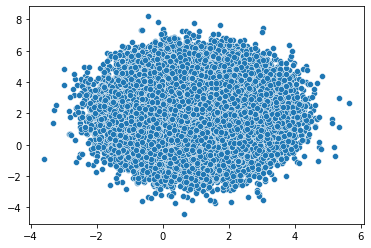

In [ ]:
### YOUR SOLUTION ###
import torch
import seaborn as sns

from  torch.distributions.multivariate_normal import MultivariateNormal

print("Using torch", torch.__version__)
torch.manual_seed(42)

m = MultivariateNormal(
    torch.Tensor([1, 2]),
    torch.Tensor([[1, 0], [0, 2]])
)

data = m.sample(torch.Size([1, 100000]))

print("log_prob", m.log_prob(data))
print("prob", m.log_prob(data).exp())

sns.scatterplot(x = data.numpy()[0][:, 0], y =data.numpy()[0][:, 1])

Generally, shapes of distributions may be confusing. A perfect guide to make your life easier: https://bochang.me/blog/posts/pytorch-distributions/

Additionally: https://stats.stackexchange.com/questions/2641/what-is-the-difference-between-likelihood-and-probability

# Likelihoods

Likelihood function is a function of parameters $\theta \in \Theta$ given by $p(D \mid \theta)$. 

> Intuition: The likelihood expresses how probable the observed data set is for different settings of the parameter $\theta$. 


## Exercise 2 Likelihood of Bernoulli

> Give an analytical formula for the likelihood function of Bernoulli distribution. Calculate the MLE. 

In [ ]:
from math import factorial

def binom(n, k):
    return factorial(n) // factorial(k) // factorial(n - k)

def binomial_log_likelihood(n, k, theta):
    return torch.log(theta**k * (1-theta)**(n-k) * binom(n, k))

## Exercise 3: Coin Tossing

a) Set $n$ to 1000

b) Simulate $n$ fair coin tosses

c) Simulate $n$ unfair coin tosses, with a probability of heads equal to $\theta = 0.75$

d) Compute the number of heads

e) Compute the mean of your *data*


f) Plot the likelihood function for the data from Exercise 2 as a function of parameter. 

g) Mark the maximum likelihood estimate of this likelihood on the plot.


#### Solution

fair ones:  493.0
unfair ones:  769.0
fair mean 500.1610107421875
unfair mean 749.7039794921875


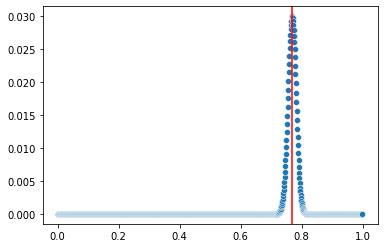

In [ ]:
### Your Solution ###
from torch.distributions import Binomial

n = 1000

fair_heads = Binomial(n, torch.Tensor([0.5]))
unfair_heads = Binomial(n, torch.Tensor([0.75]))

fair_data_data = fair_heads.sample()
unfair_heads_data = unfair_heads.sample()

print("fair ones: ", fair_data_data.item())
print("unfair ones: ", unfair_heads_data.item())

print("fair mean", fair_heads.sample((n,)).mean().item())
print("unfair mean", unfair_heads.sample((n,)).mean().item())

data = []
id = 0
max = float("-inf")
for i in range(1, n):
    dist = Binomial(n, torch.Tensor([i/n]))
    prob = dist.log_prob(unfair_heads_data).item()
    if prob > max:
        id = i
        max = prob
    data.append(prob)

fig, ax = plt.subplots()

sns.scatterplot(x=torch.arange(1, n)/n, y=torch.exp(torch.Tensor(data)), ax=ax)
ax.axvline(id/n, color='r')

## Exercise 4: Prior, posterior and coin tossing (part 2)


a) Add a plot the Beta distribution (prior for the binomial distribution) with parameters α = β = 3. What does this prior imply?

b) Add a plot of the empirically calculated posterior distribution, computed as likelihood * prior (ignoring the normalization by the probability of the data)

c) Add a plot of the theoretical posterior (reminder: Beta is conjugate to Binomial)

d) Add a vertical line at the value maximizing the posterior and a legend

In [ ]:
### Your Solution ###

# Exercise 5 MLE and MAP

Compute the difference between the two estimates for different as a function of the number of coin tosses $n$?

What is happening? Why? Justify that the prior is often just a regularizer, by finding relevant examples.



In [ ]:
### YOUR SOLUTION ###

# Motivation for using Pyro

Next week we will start using Pyro. A good introductory tutorial is provided [here](https://pyro.ai/examples/intro_long.html#Models-in-Pyro). Please cover the section Models in Pyro. 

Often, models we work with don't have an analytical form of the likelihood we want to maximize, no problem!

In [ ]:
# !pip3 install pyro-ppl 
import pyro
from pyro.distributions import constraints

def model_mle(data):
    f = pyro.param("head_probs", torch.tensor(0.5),
                   constraint=constraints.unit_interval)
    with pyro.plate("data", data.size(0)):
        pyro.sample("obs", pyro.distributions.Bernoulli(f), obs=data)

In [ ]:
#@title
pyro.render_model(model_mle, model_args=(biased_coin_tosses,), render_distributions=True, render_params=True)

NameError: ignored

In [ ]:
def train(model, guide, data, lr=0.005, n_steps=201):
    pyro.clear_param_store()
    adam_params = {"lr": lr}
    adam = pyro.optim.Adam(adam_params)
    svi = SVI(model, guide, adam, loss=Trace_ELBO())

    for step in range(n_steps):
        loss = svi.step(data)
        if step % 50 == 0:
            print('[iter {}]  loss: {:.4f}'.format(step, loss))


def guide_mle(data):
    pass



In [ ]:
# For biased coin toss
train(model_mle, guide_mle, biased_coin_tosses)

mle_estimate = pyro.param("head_probs").item()
print("Our MLE estimate of the probability of getting a head is {:.3f}".format(mle_estimate))

In [ ]:
#For fair coin toss
train(model_mle, guide_mle, fair_coin_tosses)

mle_estimate = pyro.param("head_probs").item()
print("Our MLE estimate of the probability of getting a head is {:.3f}".format(mle_estimate))